# Final Report

DS 5001 Spring 2023 Final Project

Rachel Grace Treene

rg5xm@virginia.edu

## Introduction

The corpus used for this project is the seven Harry Potter books written by J.K. Rowling. It has 1,118,267 tokens and 23,096 unique terms. The books in the corpus tell the story of Harry Potter and his adventures, culminating in an epic battle between himself and Voldemort, the evil wizard.

In this project, I consider what Quidditch, the main sport played by people in the wizarding world, can tell us about the structure and similarity of the books to one another. When considering similarity between books, can we trace any patterns relating to the subject of Quidditch that might mirror book similarity? My investigation has two parts: first, I ask what we can learn about the correlation between the books in the Harry Potter series. Second, I consider what similarities exist between patterns of book correlation and patterns of the prevalence and inclusion of Quidditch throughout the series.

## Source Data

The data comes from text files, obtained from a GitHub repository which used the Harry Potter corpus for an NLP project.

### Provenance

The original text files are located at the following repository: https://github.com/ErikaJacobs/Harry-Potter-Text-Mining. A few errors were located after downloading which were fixed to ensure more accurate work could be done.

### Location

The slightly edited source files for this project have been added to the current GitHub repository and can be found in the data directory. The link to that directory is as follows: https://github.com/rachelgracetreene/text-analytics-final-project/tree/main/data.

### Description

The subject matter of the corpus is the fictional accounts of Harry Potter, a boy who is a wizard in England in the 1990s. The source files are structured in lines, where a line is an observation, and the average document length in terms of lines is 15744.57 lines. The average document length in terms of tokens is 189055.14 tokens.

### Format

The source files are TXT files. The data in the files is plaintext.

### Data Model

We processed and annotated the corpus and converted it into the standard text analytic data model (F2) format. The main challenge during the processing was defining the correct regular expression to select chapters; this was made difficult since the chapter titles were in all caps, but some text within chapters was also capitalized. We defined a method to chunk the books by chapter without selecting extraneous text as chapter headers. Our OHCO included book number, chapter number, paragraph number, sentence number, and token number. Processing, annotating, and analyzing the corpus produced the following tables, with the following features:

#### Output: directory of files produced to meet requirements of the project
- **CORPUS** (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/output/CORPUS.csv)
    - pos_tuple: a tuple representing the part of speech and the token string
    - pos: abbreviation representing the part of speech
    - token_str: string representing the token with its formatting (capital letters, etc.)
    - term_str: string representing the term without formatting like capital letters
- **LDA-PHI** (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/output/LDA-PHI.csv)
    - T00, T01, T02, ... T18, T19: features representing topics 1-20 produced in LDA
- **LDA-THETA** (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/output/LDA-THETA.csv)
    - T00, T01, T02, ... T18, T19: features representing topics 1-20 produced in LDA
- **LIB** (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/output/LIB.csv)
    - title: title of each document
    - chapter_regex: regex corresponding with the chapter titles
    - book_len: number of tokens
    - n_chaps: number of chapters
    - kendall_sum: kendall statistic for rank correlation measurement
- **PCA-DCM** (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/output/PCA-DCM.csv)
    - PC0, PC1, ... PC8, PC9: features representing principal components 1-10 produced in PCA
    - title: title of each document
    - chapter_regex: regex corresponding with the chapter titles
    - book_len: number of tokens
    - n_chaps: number of chapters
    - kendall_sum: kendall statistic for rank correlation measurement
    - doc: title of each document with corresponding chapter numbers of each observation
- **PCA-LOADINGS** (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/output/PCA-LOADINGS.csv)
    - PC0, PC1, ... PC8, PC9: features representing principal components 1-10 produced in PCA
- **SA-DOCEMOTIONS** (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/output/SA-DOCEMOTIONS.csv)
    - anger: measurement of anger sentiment in each book
    - anticipation: measurement of anticipation sentiment in each book
    - disgust: measurement of disgust sentiment in each book
    - fear: measurement of fear sentiment in each book
    - joy: measurement of joy sentiment in each book
    - sadness: measurement of sadness sentiment in each book
    - surprise: measurement of surprise sentiment in each book
    - trust: measurement of trust sentiment in each book
    - polarity: measurement of overall sentiment in each book
- **SA-VOCAB** (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/output/SA-VOCAB.csv)
    - n: count of term in corpus
    - p: probabiliy of term occurrence in corpus
    - i: information for each term in corpus
    - n_chars: number of characters for each term in corpus
    - max_pos: maximally-occuring part of speech for term
    - n_pos: number of unique parts of speech for the term
    - cat_pos: tag for each unique part of speech for the term
    - stop: dummy variable indicating whether a term is a stopword
    - stem_porter: stem for the term according to the porter method
    - stem_snowball: stem for the term according to the snowball method
    - stem_lancaster: stem for the term according to the lancaster method
    - dfidf: global boolean term entropy
    - mean_tfidf: average significance of the term in a document
    - anger, anticipation, disgust, fear, joy, sadness, surprise, trust, sentiment, negative, positive: features representing the sentiment analysis lexicon mapped to corpus terms
    - polarity: measurement of overall sentiment for each term
- **VOCAB** (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/output/VOCAB.csv)
    - n: count of term in corpus
    - p: probabiliy of term occurrence in corpus
    - i: information for each term in corpus
    - n_chars: number of characters for each term in corpus
    - max_pos: maximally-occuring part of speech for term
    - n_pos: number of unique parts of speech for the term
    - cat_pos: tag for each unique part of speech for the term
    - stop: dummy variable indicating whether a term is a stopword
    - stem_porter: stem for the term according to the porter method
    - stem_snowball: stem for the term according to the snowball method
    - stem_lancaster: stem for the term according to the lancaster method
    - dfidf: global boolean term entropy
    - mean_tfidf: average significance of the term in a document
- **W2V-VOCAB** (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/output/W2V-VOCAB.csv)
    - n: count of term in corpus
    - p: probabiliy of term occurrence in corpus
    - i: information for each term in corpus
    - n_chars: number of characters for each term in corpus
    - max_pos: maximally-occuring part of speech for term
    - n_pos: count of unique parts of speech for the term
    - cat_pos: tag for each unique part of speech for the term
    - stop: dummy variable indicating whether a term is a stopword
    - stem_porter: stem for the term according to the porter method
    - stem_snowball: stem for the term according to the snowball method
    - stem_lancaster: stem for the term according to the lancaster method
    - dfidf: global boolean term entropy
    - mean_tfidf: average significance of the term in a document
    - vector: representation of vectorized term in (x-coord, y-coord) form
    - x: x-coordinate for vectorized term
    - y: y-coordinate for vectorized term
#### Output-Viz: directory of files produced to be imported in the visualization notebook
- **DOCS** (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/output-viz/DOCS.csv)
    - n: number of tokens in the chapter
    - book_chap_sig: significance of the chapter
- **MT** (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/output-viz/MT.csv)
    - pressed, recognized, perfectly...: aggregate tfidf (significance of term in book) for top 1000 terms of corpus by DFIDF excluding proper nouns
- **PAIRS** (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/output-viz/PAIRS.csv)
    - correl: correlation between documents a and b
    - euclidean: euclidean distance between documents a and b
    - cosine: cosine distance between documents a and b
    - cityblock: cityblock distance between documents a and b
    - jaccard: jaccard distance between documents a and b
    - js: js distance between documents a and b
- **POS-GROUP** (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/output-viz/POS-GROUP.csv)
    - n: count of words of each part of speech in corpus
    - pos_def: definition of each part of speech
    - p: probability of each part of speech
    - i: information for each part of speech
    - h: entropy of each part of speech
    - n_terms: clount of unique terms of each part of speech
    - n_tokens: count of tokens of each part of speech
- **POS** (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/output-viz/POS.csv)
    - pos_def: definition of each part of speech
    - n: count of each part of speech in corpus
    - pos_group: part of speech group associated with each part of speech
    - punc: boolean with True for all parts of speech that are punctuation
- **SA-CHAPEMOTIONS** (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/output-viz/SA-CHAPEMOTIONS.csv)
    - anger: measurement of anger sentiment in each chapter
    - anticipation: measurement of anticipation sentiment in each chapter
    - disgust: measurement of disgust sentiment in each chapter
    - fear: measurement of fear sentiment in each chapter
    - joy: measurement of joy sentiment in each chapter
    - sadness: measurement of sadness sentiment in each chapter
    - surprise: measurement of surprise sentiment in each chapter
    - trust: measurement of trust sentiment in each chapter
    - polarity: measurement of overall sentiment in each chapter

All of the methods used to perform processing, annotating the VOCAB table, LDA, Word2Vec, Sentiment Analysis, and Semantic Search are in a custom Python package called HarryPotterETA (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/HarryPotterETA.py).

## Exploration

First, I converted each book to F2 format. Then I combined each book into one corpus, from which I extracted a vocabulary. I added part of speech, stopwords, and stems to the vocabulary, and calculated term frequency inverse document frequency (TFIDF) and document frequency inverse document frequency (DFIDF).

With the corpus, I generated KDE plots showing the occurrence of the word Quidditch across all seven books, as well as the occurrence of Quidditch-related words like 'seeker', 'beater', 'chaser', 'keeper', 'snitch', and 'broomstick.' The plots are below.

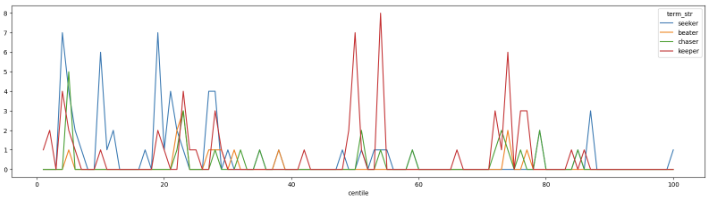

[KDE plots x3]

To compare book similarity, I normalized TFIDF grouped by book and created a table called PAIRS that calculates book similarities with various metrics. I also created a correlation matrix of the books using the Kendall rank and edited the matrix to be a heatmap. It is shown below.

[Kendall Heatmap]

Using mean TFIDF, I generated a significance measurement for each chapter of the corpus and plotting the significance for each book. The observations for my research question is similar for all books, so I only show the significance plot for Book 1. It is below.

[Significance Plot Book 1]

I then conducted Principal Component Analysis (PCA) on the top 1000 terms by DFIDF, excluding proper nouns. I chose the top ten components and created a LOADINGS table to display the output. Below is a plot of components 9 and 3 plotted against each other. PC 9 demonstrates an opposition between quidditch and the classroom.

[PCA Scatter Plot]

I conducted Latent Dirichlet Allocation (LDA) with a vector space. I used an ngram range of [1, 2] and chose 4000 features, with English stopwords. For LDA, I specified 20 topics, 20 components, 5 iteractions, and a learning offset of 5. I chose 7 terms per topic. Then I annotated the generated TOPICS manually with my own description of each topic. The annotated TOPICS table is below.

[LDA Topics Table]

Next I conducted Word 2 Vec on verbs and nouns, creating a model with a window of 2, a vector size of 256, and a minumum count of 80. For my tSNE table, I used a learning rate of 200, perplexity of 20, 2 components, a random initialization, and 1000 iterations. The resulting tSNE plot is below.

[Big tSNE Plot]

I edited the tSNE plot to show the cluster pertaining to Quidditch more closely. The plot is below.

[Small tSNE Plot]

We performed sentiment analysis with the sentiment analysis lexicon and plotted emotions for each book. I selected the chapters from each book in which a Quidditch match occurs and generated the emotions in those chapters as a heatmap for each book. Those plots are below.

[Quidditch Chapter Heatmaps]

Finally, we added code for a semantic search to the project.

## Interpretation

Provide your interpretation of the results of exploration, and any conclusion if you are comfortable making them.

Harry Potter and the Philosopher's Stone:

    Chapter 11: "Quidditch"
    Chapter 13: "Nicolas Flamel"

Harry Potter and the Chamber of Secrets:

    Chapter 10: "The Rogue Bludger"
    Chapter 14: "Cornelius Fudge"

Harry Potter and the Prisoner of Azkaban:

    Chapter 9: "Grim Defeat"
    Chapter 13: "Gryffindor versus Ravenclaw"

Harry Potter and the Goblet of Fire:

    Chapter 8: "The Quidditch World Cup"

Harry Potter and the Order of Phoenix:

    Chapter 19: "The Lion and the Serpent"

Harry Potter and the Half-Blood Prince:

    Chapter 14: "Felix Felicis"
    Chapter 19: "Elf Tails"
    Chapter 24